<a href="https://colab.research.google.com/github/Yoshiki0418/Deep_Learning/blob/main/Technique/Learning_rate_update_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## パラメータの更新手法

最適解を求めるためには、適切な学習率を設定する必要がある。では、どのようにパラメータを設定すると効率が良いだろうか？

* 学習の開始直後は大きく動いて、大域的に値が小さい領域を探したい
  * 局所最適解にはまりにくくなる
  * 最初から小刻みであると、学習に時間がかかってしまう。
* 学習終盤では、細かく更新して極小値を探したい
  * 学習率が大きすぎると収束しなくなってしまう

勾配降下法では、勾配に**学習率**をかけて更新した。

$$
\theta^{(t+1)} = \theta^{(t)} - α▽E(\theta^{(t)})
$$

しかし、学習率が小さすぎると、局所解にハマってしまい抜け出せないという問題点があった。そこで、**ミニバッチ学習SGD**という手法を用いることで対策することができた。


### ミニバッチ学習SGD

ミニバッチ学習SGDは、データ集合すべてを使って学習(**バッチ学習**)するのではなく、一部のサンプル(**ミニバッチ**)を**毎回ランダムに選択して学習**する方法(**ミニバッチ学習**)

<br>

**概要**
- **確率的選択**: データ集合からサンプルを確率的に選択し、誤差関数を求める。
- **データのシャッフル**: 実際にはデータ集合全体をシャッフルしてから順番にサンプルを選択することが一般的。

**用語解説**
- **バッチサイズ**: 一回のサンプル選択において含まれるデータの数。
- **エポック**: データ集合を1周回す単位。深層学習では複数のエポックが基本的に必要。

<br>

**ミニバッチ学習SGDのデメリット**

ここまでで、最急降下法の欠点をある程度克服することができたのですが、さらに早く損失関数の最適解にたどり着きたいというモチベーションがある。(学習速度の向上に寄与)

しかし、最適化にあたり学習の速度を遅くしてしまう**Pathlogical Curvature**などの問題があり、この克服が課題となっている。

#### Pathlogical Curvature

Pathological Curvatureとは損失の形状が以下の図のような鋭いくぼみを持つ形状のことで、ミニバッチ学習SGDだと一度の更新が大きくなってしまい、振動を起こしてしまい最適解になかなか辿り着けない状態に陥ってしまう。

<img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fimgur.com%2F6SFgsZt.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=cf443d50b33b0b2ec69be9e508bcc414" width="400">

<br>
<br>

この振動問題を抑える最適化アルゴリズムがある。これらのアルゴリズムは**過去の勾配の変化を使う**というものである。

### モーメンタム(慣性項)

モーメンタム(Momentum SGD)は、**損失関数上での過去の動きを考慮することでSGDの振動を抑える**という考えで導入された。

<br>

通常の更新量は、
$$
更新量Δ\theta^{(t)} = -α∇E(\theta^{(t-1)})
$$
であったが、モーメンタムでは、
$$
更新量Δ\theta^{(t)} = -α∇E(\theta^{(t-1)}) + γΔ\theta^{(t-1)}
$$
γ:モーメンタム係数

<br>

モーメンタムでは、前回の更新量$Δ\theta^{(t-1)}$を用いることで、勾配の方向が変わる際には行き過ぎないようにして、同じ方向に進んでいる時は勢いがつく仕組みになっている。つまり、これは**移動平均**の性質が用いられているのである。

<br>

**移動平均とは？**
移動平均は、経済でよく使われ、急な変化があるグラフに対して移動平均を用いると緩やかになったグラフが得られる優れものである。

<p align="center">
  <img src="https://www.jibunbank.co.jp/products/foreign_deposit/chart/help/sma/img/img_01.png" alt="移動平均線の説明">
</p>

上記の図は株価のチャートで用いられている移動平均線である。どの移動平均線も、ローソク足の変動と比較すると滑らかなチャートになっていることがわかる。また、移動平均線の種類にも目をつけると、5日>25日>75日と変動が日数が多くなるに連れて滑らかになっていることがわかる。

これは、移動平均の期間が長ければ長いほど過去のデータの影響が強くなるためである。これをモーメンタム係数 ($γ$) と置き換えて考えてみると、モーメンタム係数を大きくすることでより滑らかな勾配となることがわかる。

<br>
<br>

したがって、モーメンタムは単純に勾配を移動平均にすることで、振動のような急激な変化に動じないようにしているアルゴリズムであるということである。

<br>

※必ずしもSGDより良いわけではない。

### ネステロフの加速法(Nesterov’s Accelerated Gradient Method: NAG)

ネステロフの加速法(NAG)は、モーメンタムSGDをささらに発展(改良)したものである。

勾配の評価は通常、現在のパラメータ$\theta^{(t)}$に対して行うが、NAGでは更新後のパタメータを大雑把に見積もって評価に用いる。

$$
Δ\theta^{(t)} = -α∇E(\theta^{(t)} + γΔ\theta^{(t-1)}) + γΔ\theta^{(t-1)}
$$

ここでパラメータ$θ$を重み$w$として以下の式を扱うが上の式と同じなので深く考えないで欲しい。上記の式を2つの式に分解して考える。

<br>

**①慣性による移動**
$$
\bar{\mathbf{w}}_t = \mathbf{w}_t + \gamma \Delta \mathbf{w}_t
$$
* ここで、$\bar{\mathbf{w}}$は慣性項によって補正されたパラメータの位置
* $\mathbf{w}_t$は現在のパラメータ
* $γ$はモーメンタム係数
* $\Delta \mathbf{w}_t$は前回の更新量

<br>

**②勾配による移動**
$$
\mathbf{w}_{t+1} = \mathbf{w}_t - α \frac{\partial E(\bar{\mathbf{w}}_t)}{\partial \bar{\mathbf{w}}_t} + \gamma \Delta \mathbf{w}_t
$$

* $\mathbf{w}_{t+1}$は次のステップのパラメータ
* $α$は学習率
* $\frac{\partial E(\bar{\mathbf{w}}_t)}{\partial \bar{\mathbf{w}}_t}$は慣性項で補正された位置での勾配

<br>

**Nesterovの加速勾配法の特徴**
* 未来を見越したパラメータの更新

通常のモーメンタム法では、過去の勾配を利用して更新を行いますが、Nesterovでは未来の位置での勾配を見越して更新を行います。これにより、勾配の方向性がより正確に反映され、収束速度が向上します。

* 過剰な慣性の防止:

モーメンタム係数$γ$による慣性がつきすぎるのを防ぎます。これにより、振動が減り、安定した収束が得られます。




#### モーメンタム法とネステロフの加速法の比較

これらの、手法の違いでどのような違いがあるのか、それぞれの手法に対するパラメータの更新による損失の推移を見てみよう。
  <p align="center">
    <img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F275145%2F868188ec-49b0-389a-ee4d-390a71f4077c.gif?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=ccee30aaac911b9bdd05f72135567561" alt="モーメンタム法" width="400">
    <img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F275145%2F2f572c30-76be-36c2-639b-7d7eca90e45c.gif?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=cbb59dd993741185ce26a67387852a62" alt="ネステロフの加速法" width="400">
  </p>
　　　　　　　　　　　モーメンタムの収束アニメーション(58回で収束)　　　　　　　　　ネステロフの加速法の収束(43回で収束)

　　　　　　　　　　　　　　　　　　　　　　　[参照：勾配降下法、モメンタム法、nesterovの勾配加速法をアニメーション化した。](https://qiita.com/ophhdn/items/3deaf4fcc43b4f027458)

<br>
<br>

まとめると、Nesterovの加速勾配法は、モメンタム法を発展させた手法であり、まず慣性によって$\bar{\mathbf{w}}_t$に移動し、$\bar{\mathbf{w}}_t$の勾配によって2段階目の移動をするという仕組みである。これによって、慣性が付きすぎることを防ぎ、更新スピードを速くすることができるようになる。




### AdaGrad

MomentumSGD, NAG では振動抑制・収束加速に対する効果はあるが，収束方向に関する情報を用いていなかった．言い換えると，深層学習で考えるような多次元の問題では，勾配が急な方向には早く収束するが，勾配が緩やかな方向には収束に時間がかかることが起こり得る$^{[4]}$。

* **次元(スケール)ごとに勾配が違うので、次元（勾配）ごとにパラメータを適用する必要がある。**
[詳細は補足資料へ](#scrollTo=QGr0PxN4kx8r)

<br>

AdaGradは、スケールごとに学習率を調整することにより、SGDの振動を抑え、高次元の最適化問題に対処する手法です。各パラメータに対して異なる学習率を適用し、頻繁に更新されるパラメータの学習率を減少させることで、安定した収束を実現します。具体的には、振動方向の学習率を下げることで、振動を抑えます。

<br>

$$
 \Delta\theta_i^{.t} = -\frac{α}{\sqrt{\sum_{j=0}^t \nabla E(\theta_i^{(j)})^2}} \nabla E(\theta_i^{(t)})
$$


* $i$はパラメータの次元方向のインデックス
* 今までの勾配の累積和(分母)で割り、各次元で更新量を調節している


<div style="border: 1px solid; padding: 10px; text-align: center; display: inline-block;">
  変化が大きな次元 → 学習率 小<br>
  変化が小さな次元 → 学習率 大
</div>

<br>

**AdaGradの問題点**

AdaGradは累積和で割った値を学習率としているため、学習するにつれ学習率が落ちて落ちてしまう性質がある。
* 学習率が一度0に近づくと再度上げることができない
* 一度平坦になって再び勾配があるような状態では更新しづらくなる。

### RMSProp

**RMSProp** は、AdaGradの問題点である、学習が進むにつれて学習率が過度に低下し、最適解に収束する前に学習が停止してしまう問題を解決するために開発された手法です。具体的には、RMSPropでは直近の累積和のみを用いる手法を採用しています。

AdaGradでは、過去のすべての勾配の累積を使用して学習率を調整していましたが、RMSPropでは、過去の勾配の指数移動平均を使用します。さらに、指数移動平均で生じるバイアスを補正することで、高い学習率を維持しながら安定した収束を実現しています。

<br>
<br>

$ g_i^{(t)} = \nabla E(\theta_i^{(t)}) $ と表記すると

$ \Delta\theta_i^{(t)} = -\frac{\eta}{\sqrt{v_i^{(t)} + \epsilon}} g_i^{(t)} $

$ v_i^{(t)} = \rho v_i^{(t-1)} + (1 - \rho) \left(g_i^{(t)}\right)^2 \quad (v_0 = 0) $

<br>

重み付きの前回の更新量 : $\rho v_i^{(t-1)}$<br>
新しい勾配 : $\left(g_i^{(t)}\right)^2$

→以前の勾配は $\rho$ によって減衰していく


### これまでの手法の可視化

* 各種optimizerの挙動(gif)

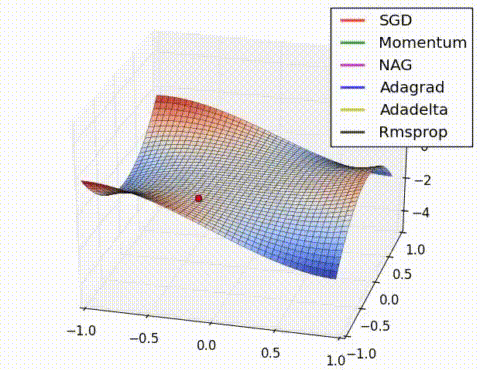

参照：[https://gifer.com/en/Di0d](https://gifer.com/en/Di0d)

### Adam

**Adam**は2015年に提案された手法で、モーメンタムとAdaGrad(RMSprop)を融合したような手法である。この２つの手法の利点を組み合わせることで、効率的にパラメータ空間を探索することができる。現在は、深層学習の適応勾配降下法としてよく用いられている。

<br>

$ g_i^{(t)} = \nabla E(\theta_i^{(t)}), \quad m^{(0)} = 0, v^{(0)} = 0 $

$ m_i^{(t)} = \beta_1 m^{(t-1)} + (1 - \beta_1) g_i^{(t)} $

$ v_i^{(t)} = \beta_2 v^{(t-1)} + (1 - \beta_2) (g_i^{(t)})^2 $

$ \hat{m}_i^{(t)} = \frac{m_i^{(t)}}{1 - \beta_1^{(t)}}, \quad \hat{v}_i^{(t)} = \frac{v_i^{(t)}}{1 - \beta_2^{(t)}} $

$ \Delta \theta_i^{(t)} = - \frac{\alpha \hat{m}_i^{(t)}}{\sqrt{\hat{v}_i^{(t)}} + \epsilon} $

* 勾配に関しても重み付き移動平均を取る
* m, vに関しては、初期値の0の付近に値が偏ることを防ぐためにバイアス補正を行う($\hat{m}, \hat{v}$)

他にも様々なアルゴリズムがあるので、詳しくは論文を参照してください。

#### 補足資料

### 多次元問題における勾配降下法の収束特性

深層学習で考えるような多次元の問題では，勾配が急な方向には早く収束するが，勾配が緩やかな方向には収束に時間がかかることが起こり得るということを2次元のデータを元に説明する。

以下では、パラメータ空間が2次元$（w_1, w_2）$であると仮定する。条件として$w_1$軸に沿って変化が緩やかで、$w_2$軸に沿って変化が急な場合を考える。

<p align="center">
  <img src="https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F218271%2F1a8b4d8b-6b2c-46a9-1e2b-f49aecb91ab3.png?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=263f2db5f0b065bf7ac10cc9d608fd64" alt="移動平均線の説明" width="700">
</p>

上記の図のような場合、$w_2$軸の勾配の方が急であるため、最初に$w_2$の方向に速く収束する。$w_2$軸に沿って収束した後、$w_1$軸に沿って収束する。

**高次元のパラメータ空間**
2次元の場合は直感的に理解しやすいかもしれませんが、**高次元のパラメータ空間では、各次元ごとに勾配の急緩が異なるため、それぞれのスケールに合わせた勾配方向を定めた方が速く最適解に行き着く**ことが期待されます。これが、適応的な学習率調整（AdaGradなど）の必要性を示しています。

### 最適化アルゴリズムの可視化

* モーメンタム系の手法は最適解を行き過ぎて、局所解にハマったりしている。
* 状況に応じて結果は変わるため、常にベストな手法は存在しない。

![](https://qiita-user-contents.imgix.net/https%3A%2F%2Fqiita-image-store.s3.ap-northeast-1.amazonaws.com%2F0%2F824193%2F9d9f1665-c72d-8f29-7a90-825a50e6213b.gif?ixlib=rb-4.0.0&auto=format&gif-q=60&q=75&w=1400&fit=max&s=51842b926cf725ef35edd12a30beedd5)

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　参照：[https://qiita.com/T-STAR/items/c77f5c318d3f3141aad4](https://qiita.com/T-STAR/items/c77f5c318d3f3141aad4)

## 参考文献



1.  【決定版】スーパーわかりやすい最適化アルゴリズム -損失関数からAdamとニュートン法-. https://qiita.com/omiita/items/1735c1d048fe5f611f80. 2021.
2.  勾配降下法、モメンタム法、nesterovの勾配加速法をアニメーション化した。. https://qiita.com/ophhdn/items/3deaf4fcc43b4f027458.
3. Sebastien Bubeck. [ORF523: Nesterov's Accelerated Gradient Descent (I'm a bandit)](https://web.archive.org/web/20210302210908/https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/). 2013
4. 深層学習の最適化アルゴリズム. https://qiita.com/ZoneTsuyoshi/items/8ef6fa1e154d176e25b8
5. 山脇輔, トラン ドック リエム, 泉文乃, 八島真人. 人間・ロボット協調操作のための適応勾配降下法を用いた繰り返し学習による可変アドミッタンス制御. 日本機械学会論文集, Vol. 89, No. 917, 2023.
6. 斎藤康毅. ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装. O'Reilly Japan. 2016.





